In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    
    
    
def Belief(State,p,r):
   
    equilibrium = r/(1-p+r);
    
    if State[0]== 0 and State[1]> 0:
            Belief = (r-r*(p-r)**(State[1]))/(1+r-p);
    elif State[0]== 1 and State[1]> 0:
            Belief = (r+(1-p)*(p-r)**(State[1]))/(1+r-p);
            
    else:
        
        Belief = equilibrium;

    return Belief;
            
        
def WhittleIndex(State,p,r):
    WhittleIndex = 0.;

    
    if State[0]== 0 and State[1]>0:
        l= State[1];
        x= Belief([0,l],p,r);
        y=Belief([0,l+1],p,r);
        WhittleIndex =((x-y)*(l+1)+y)/(1-p+(x-y)*l+y); 
    elif State[0] == 1:
        WhittleIndex = r/((1-p)*(1+r-p)+r);
    
    else:
        WhittleIndex = r/((1-p)*(1+r-p)+r);
            
    return WhittleIndex;

def update(S,C,alpha,p,r,q,s,gamma,N):
        #the update process of each timestep.
        
        #S is the list of belief states of all channels.
        #C is the list of actual channel states.
        W = [0.]*N;
        Y = [0.]*N;
        Action = [0]*N;
        Threshold = 0.;
        Seed = np.random.rand(N);
        
       #Get the Threshold. 
        for i in range(int(N*gamma)):
            Y[i]= WhittleIndex(S[i],p,r);
        for i in range(int(N*gamma),N):
            Y[i]= WhittleIndex(S[i],q,s);
        
        Y.sort();
        Threshold = Y[int((1-alpha)*N)];
        
        
        
       #Get the Action vector.
        for i in range(int(N*gamma)):
            W[i]= WhittleIndex(S[i],p,r);
        for i in range(int(N*gamma),N):
            W[i]= WhittleIndex(S[i],q,s);
    
        h=0;
        for i in range(N):
            if W[i]>= Threshold:
                Action[i]=1;
                h=h+1;
            if h >= alpha*N:
                break;
            
       #The update process.
       
        for i in range(int(N*gamma)):
        
            if Action[i] == 0 and S[i][1]>0:
                S[i][1]= S[i][1]+1;
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else:
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
                
                
                
               
             
            elif Action[i] == 0 and S[i][1]==0:
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else: 
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
            
            else:
                if C[i]==1:
                    S[i]= [1,1];
                    C[i]= int((Seed[i]<p)==True);
                    
                else:
                    S[i]= [0,1];
                    C[i]= int((Seed[i]<r)==True);
        
        for i in range(int(N*gamma),N):
        
            if Action[i] == 0 and S[i][1]>0:
                S[i][1]= S[i][1]+1;
                if C[i]==0:
                    if Seed[i]<s:
                        C[i]=1;
                    else:
                        C[i]=0;
                else:
                    if Seed[i]<q:
                        C[i]=1;
                    else:
                        C[i]=0;
                
                
                
               
             
            elif Action[i] == 0 and S[i][1]==0:
                if C[i]==0:
                    if Seed[i]<s:
                        C[i]=1;
                    else:
                        C[i]=0;
                else: 
                    if Seed[i]<q:
                        C[i]=1;
                    else:
                        C[i]=0;
            
            else:
                if C[i]==1:
                    S[i]= [1,1];
                    C[i]= int((Seed[i]<q)==True);
                    
                else:
                    S[i]= [0,1];
                    C[i]= int((Seed[i]<s)==True);
        
        
        
def action(S,C,alpha,p,r,q,s,gamma,N):
    
    W = [0.]*N;
    Y = [0.]*N;
    Action = [0]*N;
    Threshold = 0.;
 
        
    #Get the Threshold. 
    for i in range(int(N*gamma)):
        Y[i]= WhittleIndex(S[i],p,r);
    for i in range(int(N*gamma),N):
        Y[i]= WhittleIndex(S[i],q,s);
        
    Y.sort();
    Threshold = Y[int((1-alpha)*N)];
    
    #Get the Action vector.
    for i in range(int(N*gamma)):
        W[i]= WhittleIndex(S[i],p,r);
    for i in range(int(N*gamma),N):
        W[i]= WhittleIndex(S[i],q,s);
    
    h=0;
    for i in range(N):
        if W[i]>= Threshold:
            Action[i]=1;
            h=h+1;
        if h >= alpha*N:
            break;
    
    return Action;
    

In [2]:
def trace_action(S,C,timesteps,alpha,p,r,q,s,gamma,N):
    
    X = [0.]*timesteps;
  
    Action = [0]*N;
    
    for i in range(timesteps):
        
        
        Action = action(S,C,alpha,p,r,q,s,gamma,N);
        
        X[i] = average(Action,0,int(gamma*N))*gamma;
     
        
        update(S,C,alpha,p,r,q,s,gamma,N);
    
    return X;

In [3]:
def average(mylist,first,last):
    sum = 0;
    
    for i in range(first,last):
        sum = sum + mylist[i];
    
    number = last - first;
    return sum/(number);

In [4]:
class Parameters:
    
    def __init__(self,alpha,p,r,q,s,gamma,N):
        self.alpha = alpha
        self.p = p
        self.r = r
        self.q = q
        self.s = s
        self.gamma = gamma
        self.N = N
    def fileName(self):
       
        return 'output/ActionTracing_{}_{}_{}_{}_{}_{}_{}.npy'.format(self.alpha,self.p,self.r,self.q,self.s,self.gamma,self.N)
    
def simulate(parameters):
    
    return trace_action([[0,0]]*parameters.N,[0]*parameters.N,1000,parameters.alpha,parameters.p,parameters.r,parameters.q,parameters.s,parameters.gamma,parameters.N)

def computeAndSave(parameters,number_of_replicas_to_compute):
    fileName = parameters.fileName()
    number_computed = 0
    final_results = [0.]*1000
    try:
        print('file',fileName,'exists')
        final_results,number_computed = np.load(fileName,allow_pickle=True)
    except Exception as e:
        print(e)
    if number_computed < number_of_replicas_to_compute:
        print('We should do more computations')
        for n in range(int(number_computed),number_of_replicas_to_compute):
            one_computation = simulate(parameters)
            for i in range(1000):
                final_results[i] += one_computation[i]
        np.save(fileName,np.array([final_results,number_of_replicas_to_compute]))
        number_computed = number_of_replicas_to_compute
        
    print('all computation done for',parameters.fileName())


    average_action_each_time = [0.]*1000
    for i in range(1000):
        average_action_each_time[i] = final_results[i]/number_computed
        
    t = list(range(0,1000))
    plt.plot(t,average_action_each_time)


file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy exists
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy


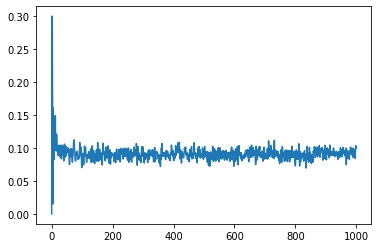

In [6]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,50),50)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy


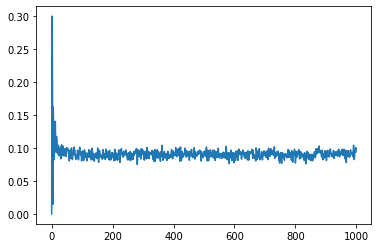

In [7]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,50),100)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy


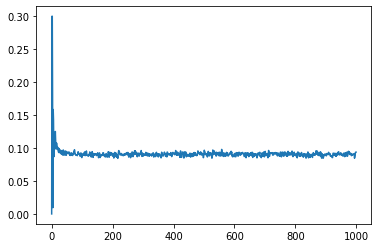

In [8]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,50),500)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_50.npy


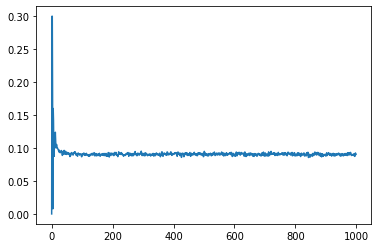

In [14]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,50),1000)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy exists
[Errno 2] No such file or directory: 'output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy'
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy


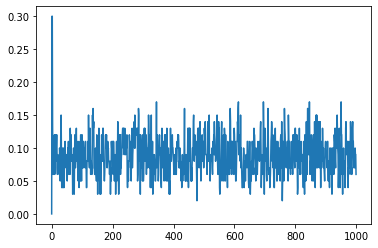

In [9]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,10),10)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy


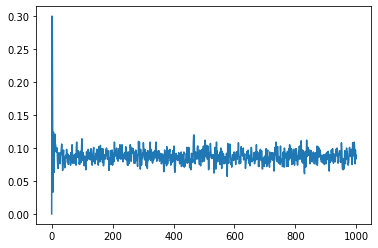

In [10]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,10),100)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy


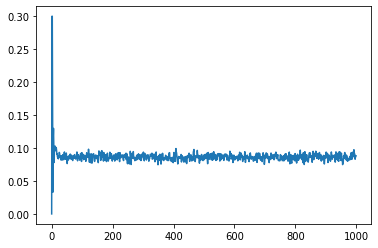

In [12]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,10),500)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy


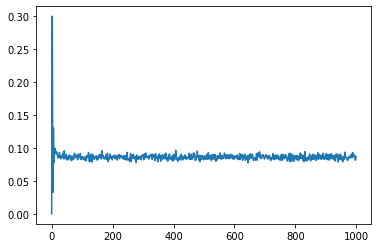

In [13]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,10),1000)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_10.npy


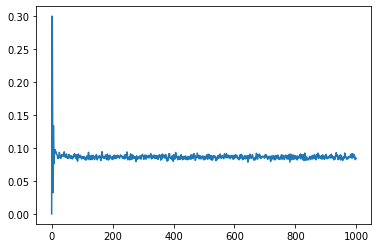

In [7]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,10),1500)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_1000.npy exists
We should do more computations
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_1000.npy


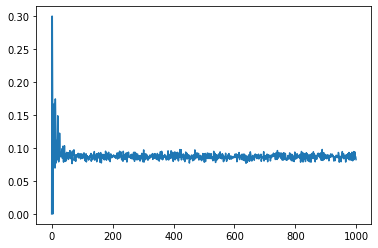

In [6]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,1000),20)

file output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_2000.npy exists
all computation done for output/ActionTracing_0.3_0.75_0.2_0.8_0.3_0.6_2000.npy


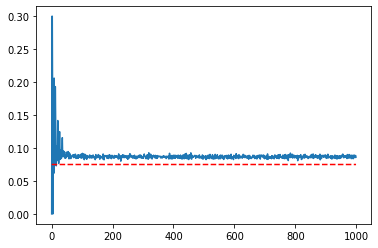

In [17]:
computeAndSave(Parameters(0.3,0.75,0.2,0.8,0.3,0.6,2000),50)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.075]*2000,'--r')

# The optimal alpha for type one channel is 0.075

file output/ActionTracing_0.2_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy exists
all computation done for output/ActionTracing_0.2_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy


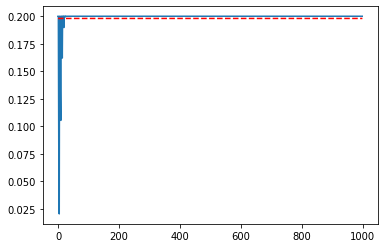

In [16]:
computeAndSave(Parameters(0.2,0.9,1/15,0.5,1/3,0.5,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.198]*2000,'--r')

#The optimal alpha for type one channel is  0.198

file output/ActionTracing_0.3_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy exists
all computation done for output/ActionTracing_0.3_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy


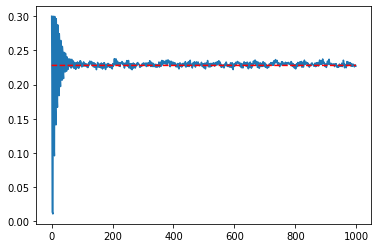

In [15]:
computeAndSave(Parameters(0.3,0.9,1/15,0.5,1/3,0.5,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.228]*2000,'--r')
#The optimal alpha for type one channel is  0.228

file output/ActionTracing_0.5_0.4_0.3_0.6_0.2_0.6_1000.npy exists
all computation done for output/ActionTracing_0.5_0.4_0.3_0.6_0.2_0.6_1000.npy


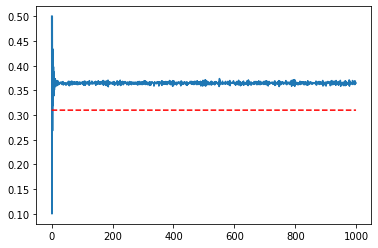

In [21]:
computeAndSave(Parameters(0.5,0.4,0.3,0.6,0.2,0.6,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.31]*2000,'--r')

#The optimal alpha for type one channel is 0.31

file output/ActionTracing_0.7_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy exists
all computation done for output/ActionTracing_0.7_0.9_0.06666666666666667_0.5_0.3333333333333333_0.5_1000.npy


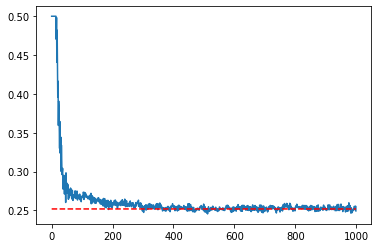

In [20]:
computeAndSave(Parameters(0.7,0.9,1/15,0.5,1/3,0.5,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.252]*2000,'--r')

#The optimal alpha for type one channel is  0.252

file output/ActionTracing_0.3_0.65_0.15_0.44_0.24_0.5_1000.npy exists
all computation done for output/ActionTracing_0.3_0.65_0.15_0.44_0.24_0.5_1000.npy


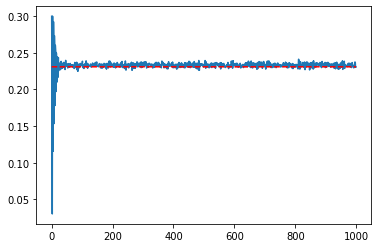

In [24]:
computeAndSave(Parameters(0.3,0.65,0.15,0.44,0.24,0.5,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.231]*2000,'--r')

#The The optimal alpha for type one channel is 0.231

file output/ActionTracing_0.6_0.4_0.3_0.6_0.2_0.5_1000.npy exists
all computation done for output/ActionTracing_0.6_0.4_0.3_0.6_0.2_0.5_1000.npy


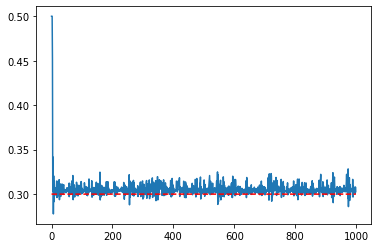

In [26]:
computeAndSave(Parameters(0.6,0.4,0.3,0.6,0.2,0.5,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.300]*2000,'--r')


#The The optimal alpha for type one channel is 0.300

file output/ActionTracing_0.6_0.4_0.3_0.6_0.2_0.6_1000.npy exists
We should do more computations
all computation done for output/ActionTracing_0.6_0.4_0.3_0.6_0.2_0.6_1000.npy


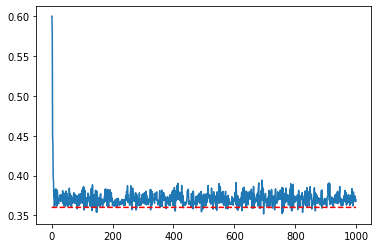

In [31]:
computeAndSave(Parameters(0.6,0.4,0.3,0.6,0.2,0.6,1000),50)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.360]*2000,'--r')

#The The optimal alpha for type one channel is 0.360

file output/ActionTracing_0.7_0.4_0.3_0.6_0.2_0.6_1000.npy exists
all computation done for output/ActionTracing_0.7_0.4_0.3_0.6_0.2_0.6_1000.npy


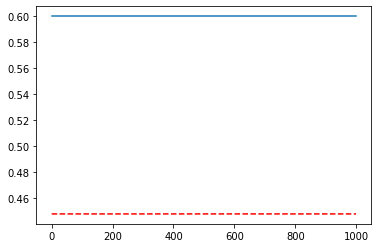

In [27]:
computeAndSave(Parameters(0.7,0.4,0.3,0.6,0.2,0.6,1000),20)
t = np.arange(0.,1000.,0.5)
plt.plot(t,[0.448]*2000,'--r')

#The The optimal alpha for type one channel is 0.448